In [0]:
try:
    from PIL import Image
except ImportError:
    import Image
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install localization

In [0]:
import pandas as pd
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
from skimage import measure
from skimage.measure import regionprops
import matplotlib.patches as patches
import localization as lx
import numpy as np
from skimage.transform import resize
import pytesseract
from PIL import Image
import pandas as pd
import requests
from io import BytesIO
from urllib.request import urlopen
from imageio import imread

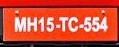

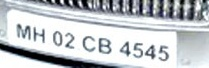

oT


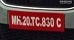

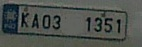

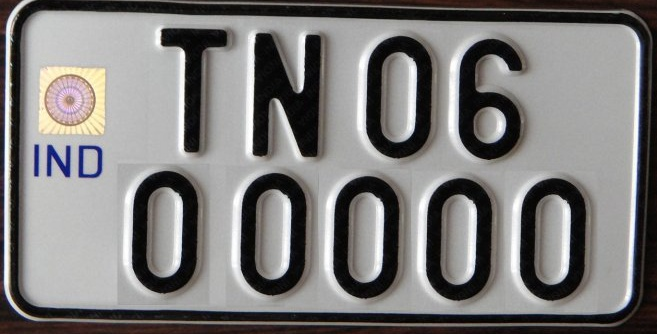

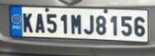

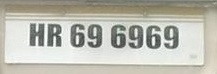

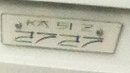

TWO7BU54-27


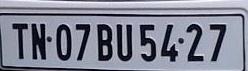

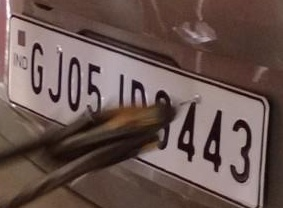

KL 55 R 2473 jf


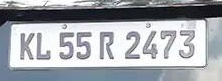

5 BLISS


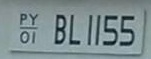

[MH20CS1¢. 1


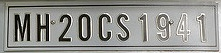

TS.09
mn EB 1458)


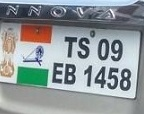

QS
4 PBOSAGITI8979
CTE


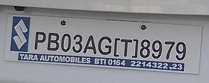

PDL 7C N 3617


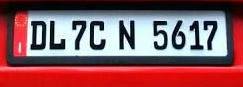

DL 3 CAY 9324
sicicscsrosscssasese


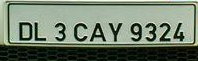

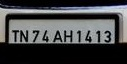

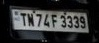

HR99B) "6662


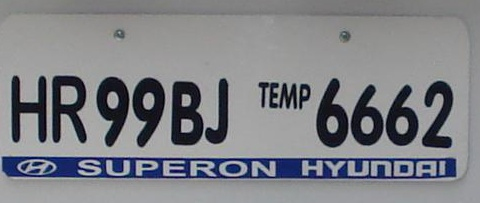

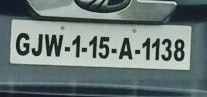

DL 12 CG 6648 |


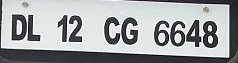

BMHO3BS 7778


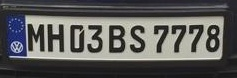

| MHO3BS 77789


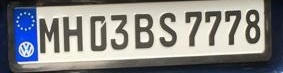

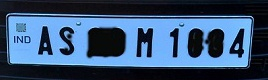

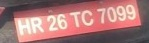

KeyboardInterrupt: ignored

In [4]:
data = pd.read_json ('/content/Indian_Number_plates.json',lines=True)
imgs = []
for num in range(len(data)):
  url = data['content'][num]
  response = requests.get(url)
  img = Image.open(BytesIO(response.content)).convert('RGB')
  cv2_image = cv2.cvtColor(np.array(img),cv2.COLOR_RGB2BGR)
  for i in data['annotation'][num]:
    x1=int(i['points'][0]['x'] * i['imageWidth'])
    y1=int(i['points'][0]['y'] * i['imageHeight'])
    x2=int(i['points'][1]['x'] * i['imageWidth'])
    y2=int(i['points'][1]['y'] * i['imageHeight'])
    roi=cv2_image[y1:y2,x1:x2]
    cv2.imwrite('temp.jpg',roi)
    temp = cv2.imread('temp.jpg')
    print(pytesseract.image_to_string(temp))
    cv2_imshow(temp)



In [1]:
data = pd.read_json ('/content/Indian_Number_plates.json',lines=True)
imgs = []
for num in range(1):
  url = data['content'][num]
  response = requests.get(url)
  img = Image.open(BytesIO(response.content)).convert('RGB')
  cv2_image = cv2.cvtColor(np.array(img),cv2.COLOR_RGB2BGR)
  for i in data['annotation'][num]:
    x1=int(i['points'][0]['x'] * i['imageWidth'])
    y1=int(i['points'][0]['y'] * i['imageHeight'])
    x2=int(i['points'][1]['x'] * i['imageWidth'])
    y2=int(i['points'][1]['y'] * i['imageHeight'])
    roi=cv2_image[y1:y2,x1:x2]
    cv2.imwrite('temp.jpg',roi)
    temp = cv2.imread('temp.jpg')

    gray_car_image = temp * 255
    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #ax1.imshow(gray_car_image, cmap="gray")
    threshold_value = threshold_otsu(gray_car_image)
    binary_car_image = gray_car_image > threshold_value
    #ax2.imshow(binary_car_image, cmap="gray")
    plt.show()

    # this gets all the connected regions and groups them together
    label_image = measure.label(binary_car_image)
    #fig, (ax1) = plt.subplots(1)
    #ax1.imshow(gray_car_image, cmap="gray");

    # regionprops creates a list of properties of all the labelled regions
    for region in regionprops(label_image):
        if region.area < 50:
            #if the region is so small then it's likely not a license plate
            continue

        # the bounding box coordinates
        minRow, minCol, maxRow, maxCol = region.bbox
        rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
        #ax1.add_patch(rectBorder)
        # let's draw a red rectangle over those regions

    plt.show()



NameError: ignored

In [0]:
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

# this gets all the connected regions and groups them together
label_image = measure.label(binary_car_image)
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray");

# regionprops creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue

    # the bounding box coordinates
    minRow, minCol, maxRow, maxCol = region.bbox
    rectBorder = patches.Rectangle((minCol, minRow), maxCol-minCol, maxRow-minRow, edgecolor="red", linewidth=2, fill=False)
    ax1.add_patch(rectBorder)
    # let's draw a red rectangle over those regions

plt.show()